In [52]:
!pip install mglearn

In [53]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

In [56]:
# We load some test data
data = load_diabetes()

In [57]:
# Put it in a data frame for future reference -- or you work from your own dataframe
df = pd.DataFrame(data['data'])

In [58]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [59]:
# We only want variables / columns 0, 1, 3, 4, 5 (this could be any column slice / mask you want to use)
predictor_variables = [0,1,2,3,4,5,6,7,8,9]
X = df[predictor_variables]
y = data['target']

In [60]:
# Split our data by 70% training (for fitting) and 30% testing (for prediction)
#X_train, x_test, Y_train, y_test = train_test_split(X, y, train_size=.7)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


#### Linear Regression

In [61]:
my_linear_reg = LinearRegression().fit(X_train, y_train)

In [62]:
my_preds_train = my_linear_reg.predict(X_train)
my_preds_test = my_linear_reg.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', my_linear_reg.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', my_linear_reg.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  42.85435785782478
Mean Squared Error on Train data :  2780.062316059081
Training Set R squared score :  0.555437148935302

TEST DATA RESULTS
Mean Absolute Error on Test data :  45.120987683251016
Mean Squared Error on Test data :  3180.1988368427274
Test Set R squared score :  0.35940090989715534


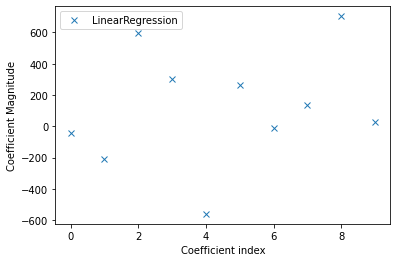

In [63]:
plt.plot(my_linear_reg.coef_,'x', label = 'LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient Magnitude')
plt.legend()

#### Ridge Regression

In [64]:
from sklearn.linear_model import Ridge

my_ridge_model = Ridge().fit(X_train, y_train)

my_preds_train = my_ridge_model.predict(X_train)
my_preds_test = my_ridge_model.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', my_ridge_model.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', my_ridge_model.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  49.35150940723046
Mean Squared Error on Train data :  3360.9674616534408
Training Set R squared score :  0.4625439622495925

TEST DATA RESULTS
Mean Absolute Error on Test data :  44.922730901372184
Mean Squared Error on Test data :  3192.3285539937624
Test Set R squared score :  0.35695757658096805


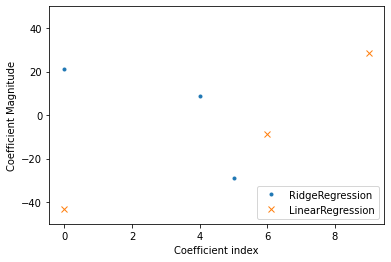

In [65]:
plt.plot(my_ridge_model.coef_, '.', label ='RidgeRegression')
plt.plot(my_linear_reg.coef_,'x', label ='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient Magnitude')
plt.ylim(-50,50)
plt.legend()

In [66]:
my_ridge_model = Ridge(alpha=10).fit(X_train, y_train)

my_preds_train = my_ridge_model.predict(X_train)
my_preds_test = my_ridge_model.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', my_ridge_model.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', my_ridge_model.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  62.50054501132881
Mean Squared Error on Train data :  5182.1657710189165
Training Set R squared score :  0.17131411891520387

TEST DATA RESULTS
Mean Absolute Error on Test data :  53.43623067733311
Mean Squared Error on Test data :  4252.86012799227
Test Set R squared score :  0.14333082046176293


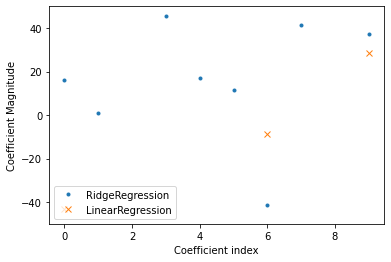

In [67]:
plt.plot(my_ridge_model.coef_, '.', label ='RidgeRegression')
plt.plot(my_linear_reg.coef_,'x', label ='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient Magnitude')
plt.ylim(-50,50)
plt.legend()

In [68]:
from sklearn.linear_model import Ridge

my_ridge_model = Ridge(alpha=0.3).fit(X_train, y_train)

my_preds_train = my_ridge_model.predict(X_train)
my_preds_test = my_ridge_model.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', my_ridge_model.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', my_ridge_model.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  44.94664039334743
Mean Squared Error on Train data :  2922.7961665495045
Training Set R squared score :  0.5326124204567636

TEST DATA RESULTS
Mean Absolute Error on Test data :  43.944106580273676
Mean Squared Error on Test data :  3077.2009573119235
Test Set R squared score :  0.38014814970668254


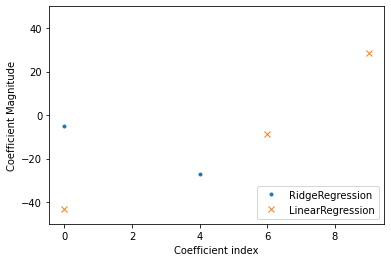

In [69]:
plt.plot(my_ridge_model.coef_, '.', label ='RidgeRegression')
plt.plot(my_linear_reg.coef_,'x', label ='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient Magnitude')
plt.ylim(-50,50)
plt.legend()

#### Lasso Regression

In [70]:
from sklearn.linear_model import Lasso

In [71]:
my_lasso = Lasso().fit(X_train, y_train)

my_preds_train = my_lasso.predict(X_train)
my_preds_test = my_lasso.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', my_lasso.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', my_lasso.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  52.20914753496101
Mean Squared Error on Train data :  3663.7514100882267
Training Set R squared score :  0.41412544493966097

TEST DATA RESULTS
Mean Absolute Error on Test data :  48.346553366035266
Mean Squared Error on Test data :  3583.4215227615487
Test Set R squared score :  0.27817828862078764


In [72]:
my_lasso.coef_

array([  0.        ,  -0.        , 442.67992538,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       330.76014648,   0.        ])

In [73]:
np.sum(my_lasso.coef_!=0)/104

0.019230769230769232

In [74]:
my_lasso = Lasso(alpha=.01).fit(X_train, y_train)

my_preds_train = my_lasso.predict(X_train)
my_preds_test = my_lasso.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', my_lasso.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', my_lasso.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  42.91525809963113
Mean Squared Error on Train data :  2785.168015420135
Training Set R squared score :  0.5546206908827188

TEST DATA RESULTS
Mean Absolute Error on Test data :  45.30755110342591
Mean Squared Error on Test data :  3206.442081410545
Test Set R squared score :  0.3541146371029106


In [75]:
my_lasso = Lasso(alpha=.01, max_iter=100000).fit(X_train, y_train)

my_preds_train = my_lasso.predict(X_train)
my_preds_test = my_lasso.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', my_lasso.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', my_lasso.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  42.91525809963113
Mean Squared Error on Train data :  2785.168015420135
Training Set R squared score :  0.5546206908827188

TEST DATA RESULTS
Mean Absolute Error on Test data :  45.30755110342591
Mean Squared Error on Test data :  3206.442081410545
Test Set R squared score :  0.3541146371029106


In [76]:
np.sum(my_lasso.coef_!=0)

9

In [77]:
my_lasso = Lasso(alpha=.0001, max_iter=100000).fit(X_train, y_train)

my_preds_train = my_lasso.predict(X_train)
my_preds_test = my_lasso.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', my_lasso.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', my_lasso.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  42.8542170577988
Mean Squared Error on Train data :  2780.0631896838486
Training Set R squared score :  0.5554370092329957

TEST DATA RESULTS
Mean Absolute Error on Test data :  45.12355574758288
Mean Squared Error on Test data :  3180.51585578708
Test Set R squared score :  0.3593370516110177


In [78]:
from sklearn.linear_model import ElasticNet

In [79]:
my_ElasticNet = ElasticNet().fit(X_train, y_train)

my_preds_train = my_ElasticNet.predict(X_train)
my_preds_test = my_ElasticNet.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', my_ElasticNet.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', my_ElasticNet.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  67.90861206234469
Mean Squared Error on Train data :  6189.035568868104
Training Set R squared score :  0.010304451830727368

TEST DATA RESULTS
Mean Absolute Error on Test data :  58.037757406519795
Mean Squared Error on Test data :  4922.355075721768
Test Set R squared score :  0.008472003027015784


In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.8, 1], 'max_iter':[1500, 10000, 100000]}
grid_search = GridSearchCV(my_ElasticNet, params, cv = 3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.8, 1],
                         'max_iter': [1500, 10000, 100000]})

In [82]:
grid_search.best_params_

{'alpha': 0.001, 'max_iter': 1500}

In [83]:
my_preds_train = grid_search.predict(X_train)
my_preds_test = grid_search.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', grid_search.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', grid_search.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  43.914481342069465
Mean Squared Error on Train data :  2843.7905568988426
Training Set R squared score :  0.5452462951988923

TEST DATA RESULTS
Mean Absolute Error on Test data :  44.284128354158526
Mean Squared Error on Test data :  3102.2471802484497
Test Set R squared score :  0.3751029973603026
